Saving Chennai_EV_Data.xlsx to Chennai_EV_Data (2).xlsx
     Location  EV Vehicle Density  Infrastructure  \
0       Adyar                 152               6   
1  Anna Nagar                 485               9   
2    T. Nagar                 398               1   
3    Mylapore                 320              10   
4   Velachery                 156               3   

   Residential/Office Buildings  Renewable Sources (%) Type of EV Station  
0                           661                  53.18       Supercharger  
1                           971                  56.94       Fast Charger  
2                           487                  87.22       Fast Charger  
3                           101                  58.56     Normal Charger  
4                           489                  32.08       Supercharger  
Cluster Centers (in original scale):
[[422.25         7.625      711.75        41.68625   ]
 [178.16666667   4.66666667 779.83333333  42.99      ]
 [302.           5.1  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


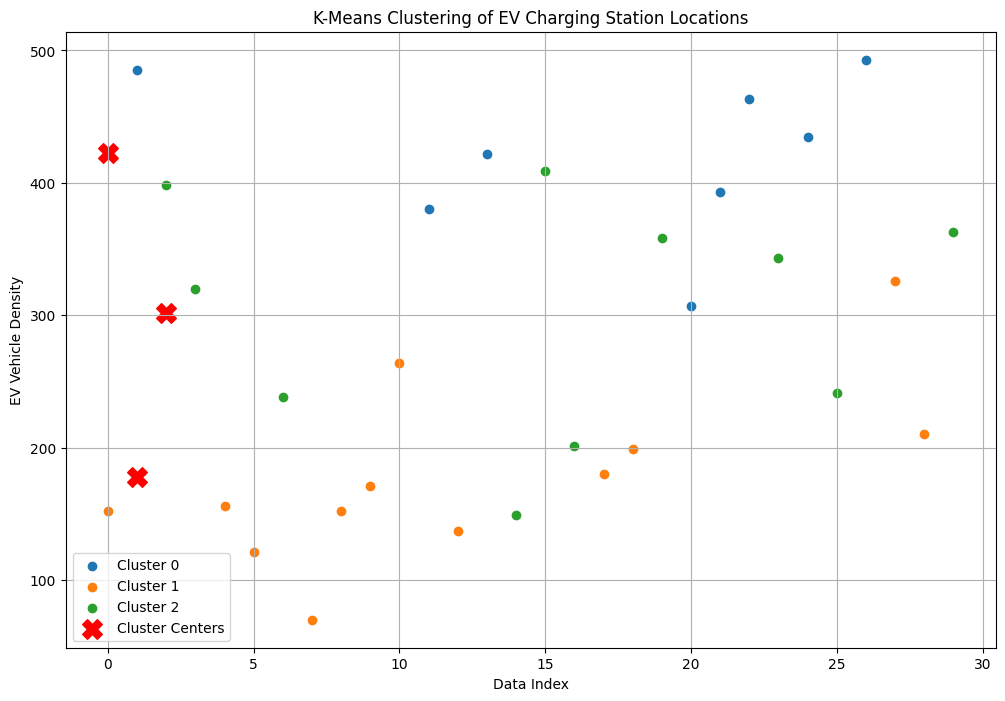

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

data = pd.read_excel('Chennai_EV_Data.xlsx', sheet_name='Sheet1')

print(data.head())

features = ['EV Vehicle Density', 'Infrastructure', 'Residential/Office Buildings', 'Renewable Sources (%)']
X = data[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

centers = scaler.inverse_transform(kmeans.cluster_centers_)

print("Cluster Centers (in original scale):")
print(centers)

plt.figure(figsize=(12, 8))
for cluster in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data.index, cluster_data['EV Vehicle Density'], label=f'Cluster {cluster}')

plt.scatter(range(len(centers)), centers[:, 0], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('K-Means Clustering of EV Charging Station Locations')
plt.xlabel('Data Index')
plt.ylabel('EV Vehicle Density')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
!pip install pandas scikit-learn matplotlib folium


In [13]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

data = pd.read_excel('chennai_maps.xlsx', sheet_name='Sheet1')


Saving chennai_maps.xlsx to chennai_maps (2).xlsx


In [14]:
from sklearn.preprocessing import StandardScaler

features = ['EV Vehicle Density', 'Infrastructure', 'Residential/Office Buildings', 'Renewable Sources (%)']
coords = ['Latitude', 'Longitude']

X = data[features].values
locations = data[coords].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
from sklearn.cluster import KMeans

num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

cluster_centers = kmeans.cluster_centers_

cluster_centers_original = scaler.inverse_transform(cluster_centers)

geo_centers = []

for i in range(num_clusters):
    cluster_data = locations[data['Cluster'] == i]
    geo_center = cluster_data.mean(axis=0)
    geo_centers.append(geo_center)

geo_centers = pd.DataFrame(geo_centers, columns=coords)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
import folium
map_center = [locations[:, 0].mean(), locations[:, 1].mean()]
ev_map = folium.Map(location=map_center, zoom_start=10)

for idx, row in data.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color='blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(ev_map)

for idx, row in geo_centers.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f'Cluster Center {idx}',
        icon=folium.Icon(color='red')
    ).add_to(ev_map)

ev_map
